## Observations and Insights 
Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data.

#1. The correlation between weight and tumor value is 0.84 which is considered a strong positive correlation (weight and tumor volume move in same direction)    
#2. Capomulin and Ramicane had the lowest mean, median, variance and SEM Tumor volumes indicating they are the most effective drug regimens. Those 2 drug regimens also had the highest number of mice studied
#3. As shown on Line point, Tumor Volume went down significantly as Timepoint (45 days) increased for drug Capomulin 
#4. There was essentially an equal number of male and female mice in the study 

In [126]:
%matplotlib notebook
%matplotlib inline

In [159]:
# Import Dependencies Libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Read in the Mouse Study Data CSVs to Dataframes
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset - outer merge for duplicates
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Check the number of mice
number_of_mice = len(study_results["Mouse ID"].unique())
number_of_mice

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics


In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create summary table displaying # of drug regimens for each drug
summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())
summarystats

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [107]:
#Use groupby to create summary stats for the drug regimens; add results into columns in summary table
summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Display 5 summarystats (mean, median, stand dev, var, SEM and keep column for the number of drug regimens
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename Mouse ID count column (can rename any column) to Trials (# of regimens for each drug)
summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})
summarystats

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar & Pie Charts

In [108]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Filter Dataframe to column to bar chart
Total_mice_per_regimen = summarystats[["Trials"]]
Total_mice_per_regimen

,Trials
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


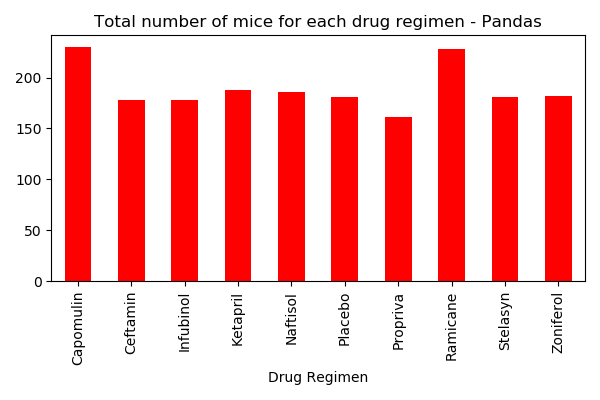

In [109]:
#Create a bar chart of the data
Total_mice_per_regimen.plot(kind="bar", figsize=(6,4), color = "r", legend=False)

# Set a title for the chart
plt.title("Total number of mice for each drug regimen - Pandas")

plt.show()
plt.savefig('barchart1')
plt.tight_layout()

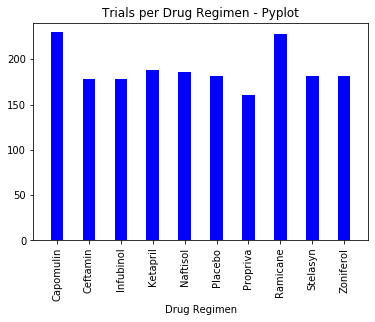

In [201]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(Total_mice_per_regimen))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, Total_mice_per_regimen["Trials"], color = "b", width = .4)
plt.xticks(tick_locations, Total_mice_per_regimen.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(Total_mice_per_regimen["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regimen - Pyplot")
plt.xlabel("Drug Regimen")

# Display and save graph
plt.savefig('barchart2')
plt.show()

In [134]:
# Pie Plots -Generate a pie plot showing the distribution of female versus male mice using pandas
bygender = mouse_metadata.groupby("Sex").count()
bygender

labels = [mouse_metadata['Sex'].unique()]
newlist = list(bygender.index)
newlist

sizes = [bygender["Mouse ID"]]
sizes

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

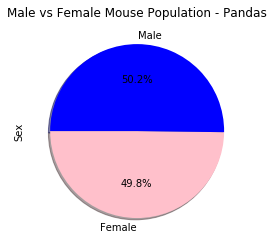

In [158]:
# The colors of each section of the pie chart
colors = ["pink", "blue"]

plt.pie(sizes, labels=newlist, colors=colors, autopct="%1.1f%%",
         shadow=True, startangle=180)
plt.title('Male vs Female Mouse Population - Pandas')
plt.ylabel('Sex')

plt.savefig('piechart1')
plt.show()

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

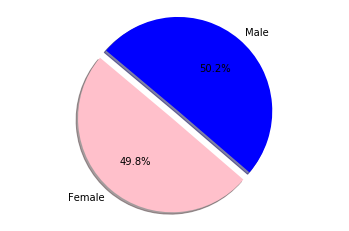

In [143]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [124,125]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [202]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Ceftamin") | (combined_data["Drug Regimen"] == "Infubinol"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values(["Timepoint", "Drug Regimen", "Metastatic Sites"], ascending=[False, True, False])

filtered_df.head(60)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
104,u364,Capomulin,Male,18,17,45,31.023923,3
134,r554,Capomulin,Female,8,17,45,32.377357,3
380,l509,Capomulin,Male,17,21,45,41.483008,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
204,i738,Capomulin,Female,23,20,45,37.311846,2
224,w914,Capomulin,Male,24,21,45,36.041047,2
309,b128,Capomulin,Female,9,22,45,38.982878,2
350,v923,Capomulin,Female,19,21,45,40.658124,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
390,r944,Capomulin,Male,12,25,45,41.581521,2


In [180]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


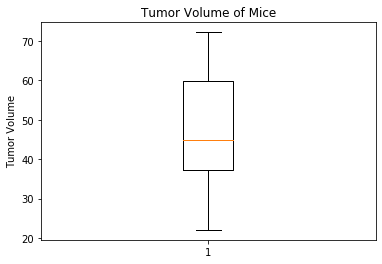

In [162]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

In [194]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Filter original data for just the Capomulin Drug Regimen
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [195]:
#Select mouse treated with Capomulin
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


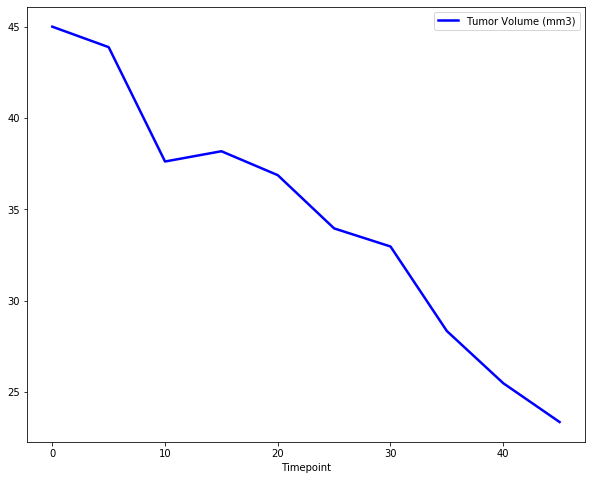

In [197]:
#Select 2 colums of interest
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

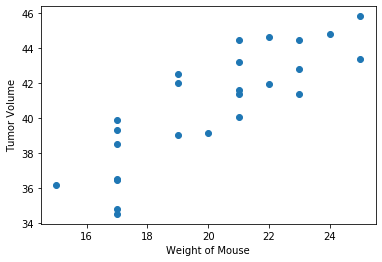

In [108]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

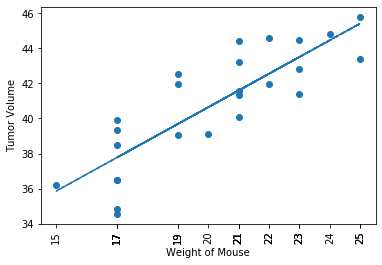

The correlation between weight and tumor volume is 0.84


In [200]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on mouse weight and tumor volume
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate mouse weight
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor volume is {corr}')